<h1>Sequence Of Independent Counters </h1>

Let $\{x_0,x_1,\ldots,x_{N-1}\}$ be a sequence of $N$ numbers, referred to as dense counters, that are generated from independent random variables each attaining value from a finite set $\{0,1,\ldots,X\}$, however, each having a different distribution $p_i(x)$, $i=0,\ldots,N-1$. Let $P\in[0,1]^{(X+1)\times N}$ be a left stochastic matrix whose columns represent the distributions $p_i(x)$, $i=0,1,\ldots,N-1$.

Let $W$ be a positive integer not higher than $N$. Let $\{y_0,y_1,\ldots,y_{N-W}\}$ be a sequence of $N-W+1$ numbers, referred to as sparse counters, that are related to dense counters by a set of linear equations 

$$ y_i = \sum_{k=i}^{i+W-1} x_k\,, \qquad i=0,\ldots,N-W\:. $$ 

Therefore the sparse counters are numbers generated from random variables each attaining value from finite set $\{0,1,\ldots,Y\}$, where $Y=X\cdot W$, and having distributions $q_i(y)$, $i=0,\ldots,N-W$. Let $Q\in[0,1]^{(Y+1)\times (N-W+1)}$ be a left stochastic matrix whose columns represent the distributions $q_i(y)$, $i=0,1,\ldots,N-W$.

<h1>Probabilistic convolution</h1>

Given distributions of dense counters $P\in[0,1]^{(X+1)\times N}$, the distributions of the sparse counters $Q\in[0,1]^{(Y+1)\times (N-W+1)}$ can be computed by 

$$ q_i(y) = \sum_{x_i=0}^X \sum_{x_{i+1}=0}^X\cdots\sum_{x_{i+W-1}=0}^X p_i(x_i)\,p_{i+1}(x_{i+1})\cdots p_{i+W-1}(x_{i+W-1})\, \delta(x_i+x_{i+1}+\cdots +x_{i+W-1}=y) $$

where $\delta(A)=1$ if $A$ is true and $0$ otherwise. The operation is referred to as the probabilistic convolution with window size $W$.

<h1>Probabilistic deconvolution</h1>

Given a left stochastic matrix $Q\in [0,1]^{(Y+1)\times (N-W+1)}$, the tasks is to find distributions of dense counters $\hat{P}\in[0,1]^{(X+1)\times N}$ such that the distribution of sparse counters $\hat{Q}$ computed from $\hat{P}$ by the probabilistic deconvolution minimizes the Kullback-Leibler divergence

$$
KL(Q|| \hat{Q}) = -\sum_{i=0}^{N-W+1} \sum_{y=0}^Y q_i(y) \log \frac{q_i(y)}{\hat{q}_i(y)}
$$

The operation is referred to as the probabilistic deconvolution with window size $W$. The probabilistic deconvolution tries to reconstruct the distribution of the dense counters $P$ from the distribution of the sparse counters $Q$. In contrast to the probabilistic convolution, the probabilistic deconvolution is not guarantted to have unique solution, i.e. there can be more distributions of dense counters which yiled the same distribution of sparse counters. 

This library computes the probabistic deconvolution by an iterative method resembling the Expectation-Maximization algorithm. The method produces a sequence $\hat{P}_0,\ldots,\hat{P}_T$ such that $\hat{Q}_0,\ldots,\hat{Q}_T$ obtained by the probabilistic convolution monotonically increases $KL(Q|| \hat{Q})$. The initial $\hat{P}_0$ is generated uniformy at random. It uses a fixed number of iterations $T$ which is set to $50$ by default. The computational and memory complexity grows linearly with $N$ but exponentially with $W$.


In [ ]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import pdeconv as pd

n_x = 5  # max value of a dense counter
N  = 10  # length of the sequence of dense counters
W  = 3   # window size

# Generate distributions of the dense counters randomly
P = np.random.rand( n_x + 1, N )
P = P / np.sum( P, axis=0)

# Probabilistic convolution: compute distribution of sparse counters
soic = pd.SOIC( W )
Q = soic.conv( P )

# Probabilistic deconvolution: reconstruct distribution of dense counters
P_est, Q_est, neg_kl_history = soic.deconv( Q )


100%|██████████| 50/50 [00:05<00:00,  8.78it/s]


Text(0.5, 0, 'epoch')

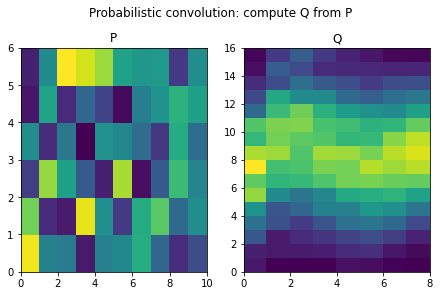

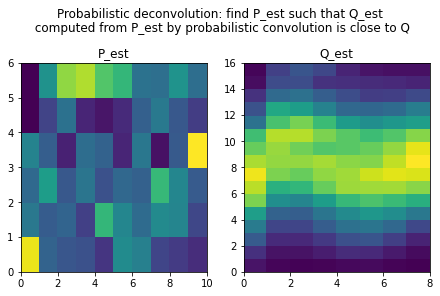

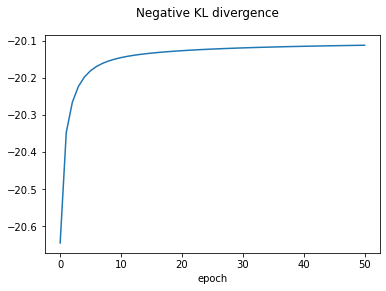

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].pcolor( P )
axs[1].pcolor( Q)
axs[0].set_title("P")
axs[1].set_title("Q")
fig.suptitle("Probabilistic convolution: compute Q from P")

fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].pcolor( P_est )
axs[1].pcolor( Q_est)
axs[0].set_title("P_est")
axs[1].set_title("Q_est")
fig.suptitle("Probabilistic deconvolution: find P_est such that Q_est\n computed from P_est by probabilistic convolution is close to Q")


fig = plt.figure()
plt.plot( neg_kl_history )
fig.suptitle("Negative KL divergence")
plt.xlabel("epoch")
